# Use self-trained  analyzer to do sentiment analyze on tweets
### 1. Train a sentiment classifier, test it and store it for future use
### 2. Build trainer from nltk.corpus movie_reviews, positive&negative dataset from yelp and amazon
### 3. Test the accuracy of classifier and store it
### 4. Pick six related keywords of United Airline incident and see what people are complain or praise about
### 5. Use this well trained classifier to check the tweets from people 

In [195]:
from nltk.corpus import movie_reviews
from nltk import precision
import nltk.metrics
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
import collections
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.axes
import pickle
import pandas as pd
from pandas import DataFrame, Series
import re
import matplotlib.patches as mpatches

# 1. Train a sentiment classifier, test it and store it for future use
#### Build trainer from nltk.corpus movie_reviews, positive&negative dataset from yelp and amazon

In [196]:
# Grab some movie review data
reviews = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(reviews)
train_movies = reviews[0:200]

In [197]:
# function to get list of (word, pos) or (word, neg) tuples
def get_list(d):
    t=d.split('\n')
    list_train=[]
    for line in t:
        i=[]
        i=line.split('\t')
        if i!=['']:
            if i[1]=='0':
                i[1]='neg'
            else:
                i[1]='pos'
            list_train.append((i[0],i[1]))
    return list_train

In [198]:
file1 = open('/Users/lisha/Desktop/Final/Data/sentiment_labelled_sentences/yelp_labelled.txt', 'r')
file2 = open('/Users/lisha/Desktop/Final/Data/sentiment_labelled_sentences/amazon_cells_labelled.txt', 'r')
file3=open('/Users/lisha/Desktop/Final/Data/sentiment_labelled_sentences/imdb_labelled.txt', 'r')
d1=file1.read()
d2=file2.read()
d3=file3.read()
list_train1=get_list(d1)
list_train2=get_list(d2)
list_train3=get_list(d3)

### Train the classifier and save it as classifier.pickle for future use.

In [199]:
classifier = NaiveBayesClassifier(list_train1)

In [200]:
classifier.update(train_movies)

True

In [8]:
classifier.update(list_train2)

True

In [16]:
classifier.update(list_train3)

True

In [201]:
save_classifier = open("/Users/lisha/Desktop/Final/classifier_lisha.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

In [203]:
classifier.classify("this is not bad") 

'pos'

# 3. Test the accuracy of classifier

In [7]:
classifier_f = open("/Users/lisha/Desktop/Final/classifier_lisha.pickle", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()

In [19]:
def word_feats(words):
    return dict([(word, True) for word in words])

In [20]:
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')
negfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in negids]
posfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in posids]
negcutoff = int(len(negfeats)*3/4)
poscutoff = int(len(posfeats)*3/4)

In [21]:
trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

In [204]:
for i, (feats, label) in enumerate(testfeats):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

In [448]:
print ('train on %d instances, test on %d instances' % (len(trainfeats), len(testfeats)))
print ('pos precision:', precision(refsets['pos'], testsets['pos']))
print ('pos recall:', recall(refsets['pos'], testsets['pos']))
print ('pos F-measure:', f_measure(refsets['pos'], testsets['pos']))
print ('neg precision:', precision(refsets['neg'], testsets['neg'])
print ('neg recall:', recall(refsets['neg'], testsets['neg'])
print ('neg F-measure:', f_measure(refsets['neg'], testsets['neg']))

train on 1500 instances, test on 500 instances
pos precision: 0.9013157894736842
pos recall: 0.548
pos F-measure: 0.681592039800995
neg precision: 0.9213134995736857
neg recall: 0.493
neg F-measure: 0.7042253521126761


# 4. Pick six related keywords of United Airline incident and see what people are complain or praise about

### Get rid of the tweets that have nothing to do with these keywords

In [44]:
def remove_http(x):
    x=re.sub(r'http\S+', '', x, flags=re.MULTILINE)
    return x 

In [309]:
def get_united(x):
    if 'united' in x.lower():
        return 1
    else:
        return 0
def get_flight(x):
    if 'flight' in x.lower():
        return 1
    else:
        return 0
def get_passenger(x):
    if 'passenger' in x.lower():
        return 1
    else:
        return 0
def get_airline(x):
    if 'airline' in x.lower():
        return 1
    else:
        return 0
def get_ceo(x):
    if 'ceo' in x.lower():
        return 1
    else:
        return 0
def get_overbook(x):
    if 'overbook' in x.lower():
        return 1
    else:
        return 0

In [206]:
list_key=['united','flight','passenger','airline','ceo','overbook']

In [310]:
df = pd.read_csv('Data/Data_Clean/Tweets_withINFO.csv')
df1=df.drop_duplicates()
df0=df1.fillna(value=0)
df0['text']=df0['text'].apply(lambda x: remove_http(x))

In [311]:
len(df0)

50649

In [312]:
df0['united']=df0['text'].apply(lambda x: get_united(x))
df0['flight']=df0['text'].apply(lambda x: get_flight(x))
df0['passenger']=df0['text'].apply(lambda x: get_passenger(x))
df0['airline']=df0['text'].apply(lambda x: get_airline(x))
df0['ceo']=df0['text'].apply(lambda x: get_ceo(x))
df0['overbook']=df0['text'].apply(lambda x: get_overbook(x))

In [313]:
df0['sum']=df0['united']+df0['flight']+df0['passenger']+df0['airline']+df0['ceo']+df0['overbook']

In [314]:
df0=df0[df0['sum'] != 0]

In [315]:
df0.head()

,Unnamed: 0,id,name,created_at,text,country_code,long,latt,retweet_count,user_created,...,friends_count,user_language,favorite_count,united,flight,passenger,airline,ceo,overbook,sum
0,0,851471781827420160,United,Mon Apr 10 16:27:47 +0000 2017,United CEO response to United Express Flight 3...,US,-95.823268,29.522325,21757,Fri Mar 04 21:23:11 +0000 2011,...,46648,en,7840,1,1,0,0,1,0,3
1,1,851875102769721344,United,Tue Apr 11 19:10:26 +0000 2017,United CEO Oscar Munoz: I’m sorry. We will fix...,US,-95.823268,29.522325,3098,Fri Mar 04 21:23:11 +0000 2011,...,46648,en,4774,1,0,0,0,1,0,2
2,2,851383383888285696,United,Mon Apr 10 10:36:31 +0000 2017,@USAnonymous Flight 3411 from Chicago to Louis...,0,0.000000,0.000000,1373,Fri Mar 04 21:23:11 +0000 2011,...,46648,en,852,0,1,0,0,0,1,2
3,3,851947964599648256,Triston,Tue Apr 11 23:59:57 +0000 2017,RT @UnitedOverBooks: now boarding flight 3411 ...,0,0.000000,0.000000,2235,Sun Jan 01 02:36:00 +0000 2012,...,987,en,0,1,1,0,0,0,1,3
4,4,851947959851921408,TΞddy Rosenthal,Tue Apr 11 23:59:56 +0000 2017,RT @UnitedOverBooks: now boarding flight 3411 ...,0,0.000000,0.000000,2235,Thu Jul 09 15:01:43 +0000 2015,...,227,en,0,1,1,0,0,0,1,3


In [316]:
len(df0)

25163

### Catagories tweets by keywords

In [317]:
df1=df0.loc[:, ['created_at','text','united','flight','passenger','airline','ceo','overbook']]

In [318]:
df1.head()

,created_at,text,united,flight,passenger,airline,ceo,overbook
0,Mon Apr 10 16:27:47 +0000 2017,United CEO response to United Express Flight 3...,1,1,0,0,1,0
1,Tue Apr 11 19:10:26 +0000 2017,United CEO Oscar Munoz: I’m sorry. We will fix...,1,0,0,0,1,0
2,Mon Apr 10 10:36:31 +0000 2017,@USAnonymous Flight 3411 from Chicago to Louis...,0,1,0,0,0,1
3,Tue Apr 11 23:59:57 +0000 2017,RT @UnitedOverBooks: now boarding flight 3411 ...,1,1,0,0,0,1
4,Tue Apr 11 23:59:56 +0000 2017,RT @UnitedOverBooks: now boarding flight 3411 ...,1,1,0,0,0,1


### Use the trained classifier to check each tweet, 1 stands for positive and -1 stands for negative. Get the tweet date of each text. Add token for future caculation.

In [319]:
def get_attitude(x):
    if classifier.classify(x)=='pos':
        return 1
    else:
        return -1

In [320]:
def get_date(x):
    return x[8:10] 

In [353]:
df2=df1[:10000]

In [354]:
df3=df2.loc[:, ['created_at','text','united','flight','passenger','airline','ceo','overbook']]

In [355]:
df3['attitude']=df2['text'].apply(lambda x: get_attitude(x))

In [356]:
df3['token']=1

In [357]:
df3['date']=df3['created_at'].apply(lambda x: get_date(x))

In [358]:
df3.head()

,created_at,text,united,flight,passenger,airline,ceo,overbook,attitude,token,date
0,Mon Apr 10 16:27:47 +0000 2017,United CEO response to United Express Flight 3...,1,1,0,0,1,0,1,1,10
1,Tue Apr 11 19:10:26 +0000 2017,United CEO Oscar Munoz: I’m sorry. We will fix...,1,0,0,0,1,0,1,1,11
2,Mon Apr 10 10:36:31 +0000 2017,@USAnonymous Flight 3411 from Chicago to Louis...,0,1,0,0,0,1,1,1,10
3,Tue Apr 11 23:59:57 +0000 2017,RT @UnitedOverBooks: now boarding flight 3411 ...,1,1,0,0,0,1,1,1,11
4,Tue Apr 11 23:59:56 +0000 2017,RT @UnitedOverBooks: now boarding flight 3411 ...,1,1,0,0,0,1,1,1,11


### Group the token by different keyword and attitude. Store the positive and negative attitude in two list

In [359]:
df4=DataFrame(df3.groupby(['united','attitude'])['token'].sum())
df5=DataFrame(df3.groupby(['flight','attitude'])['token'].sum())
df6=DataFrame(df3.groupby(['passenger','attitude'])['token'].sum())
df7=DataFrame(df3.groupby(['airline','attitude'])['token'].sum())
df8=DataFrame(df3.groupby(['ceo','attitude'])['token'].sum())
df9=DataFrame(df3.groupby(['overbook','attitude'])['token'].sum())

In [375]:
df6.head()

token
passenger attitude       
0         -1          404
           1         7584
1         -1           50
           1         1962

In [385]:
list_pos=[df4['token'][2],df5['token'][2],df6.['token'][2],df7['token'][2],df8[1,-1][0],df9[1,-1][0]]
list_neg=[-1*df4['token'][3],-1*df5['token'][3],-1*df6[1,1][0],-1*df7[1,1][0],-1*df8[1,1][0],-1*df9[1,1][0]]

In [386]:
list_neg

[-6802, -5159, -1962, -3680, -947, -776]

In [388]:
list_pos

[256, 178, 50, 256, 23, 12]

# 5. Use this well trained classifier to check the tweets from people 

### Plot a fig to see people's attidued.

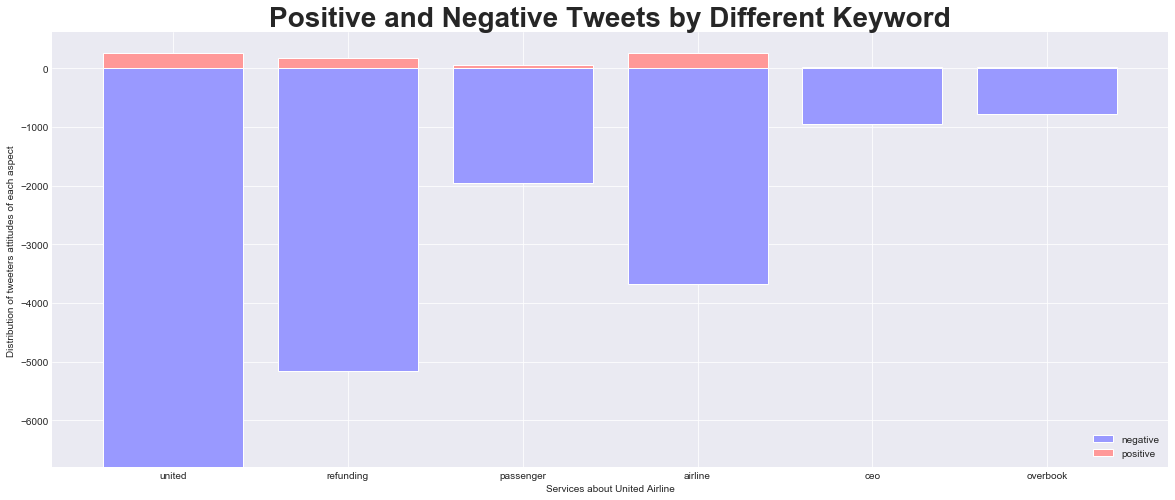

In [446]:
plt.figure(figsize=(20,8))
x = range(6)
ax = plt.subplot(111)
p1=ax.bar(x, list_neg, facecolor='#9999ff', edgecolor='white')
p2=ax.bar(x, list_pos, facecolor='#ff9999', edgecolor='white')
plt.legend([p1, p2], ('negative', 'positive'))
my_xticks = list_key
plt.xticks(x, my_xticks)
ax.set_title('Positive and Negative Tweets by Different Keyword', fontsize=28,
             fontweight='bold')
plt.xlabel('Services about United Airline')
plt.ylabel('Distribution of tweeters attitudes of each aspect')
plt.savefig('Attitude.jpg')
plt.show()

In [3]:
classifier_f = open("/Users/lisha/Desktop/Final/classifier_lisha.pickle", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()

In [402]:
df10=DataFrame(df3.groupby(['date','attitude'])['token'].sum())

In [414]:
df10.head()

token
date attitude       
07   -1           14
      1           79
08   -1            8
      1           82
09   -1            6

In [433]:
y1=[]
y2=[]
j=-2
for i in range(int(len(df10)/2)):
    y1.append(df10['token'][j+2])
    y2.append(df10['token'][j+2+1])
    j=j+2
x2=list(DataFrame(df3.groupby(['date'])['token'].sum()).index)

In [435]:
y1

[14, 8, 6, 30, 57, 32, 96, 90, 14, 19, 81, 7]

In [436]:
y2

[79, 82, 85, 429, 952, 1183, 1159, 1315, 1304, 863, 1714, 381]

In [434]:
x2

['07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18']

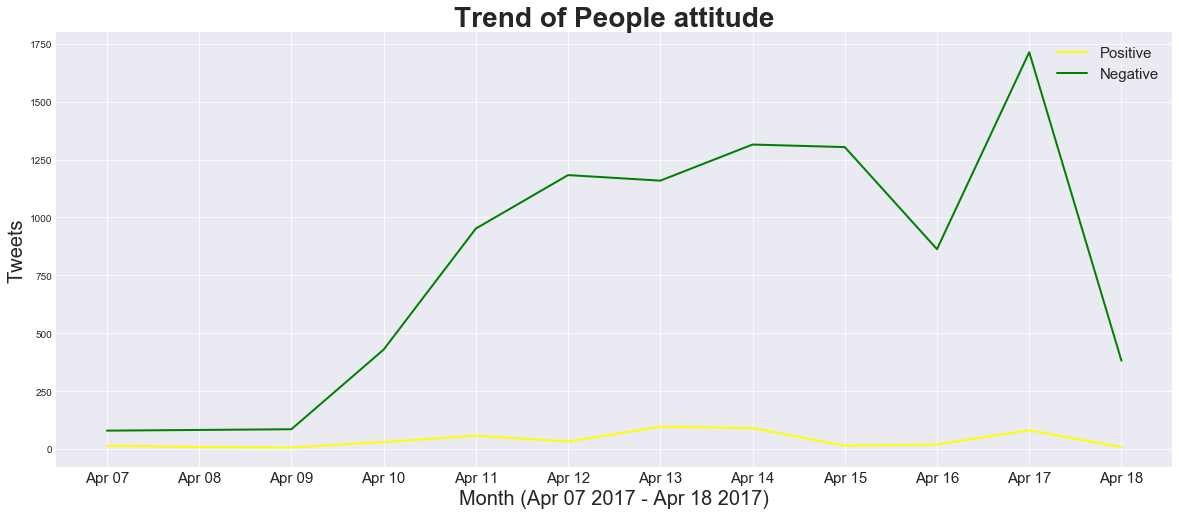

In [443]:
plt.style.use('seaborn-darkgrid')
plt.subplots(figsize=(20,8))
ax1 = plt.subplot(1,1,1)
ax1.plot(x2, y1, linewidth=2, linestyle='-',  label='Positive', color='Yellow')
ax1.plot(x2, y2, linewidth=2, linestyle='-',  label='Negative', color='Green')
ax1.set_title('Trend of Attitude towards UA3411 Incident', fontsize=28,
             fontweight='bold')
plt.xlabel('Month (Apr 07 2017 - Apr 18 2017)', fontsize=20)
plt.ylabel('Tweets', fontsize=20)
ax1.set_xticks(np.arange(len(x2)))
ax1.set_xticklabels(['Apr 07','Apr 08','Apr 09','Apr 10','Apr 11','Apr 12','Apr 13','Apr 14','Apr 15','Apr 16','Apr 17','Apr 18'],fontsize=15)
plt.legend(loc='upper right', fancybox=True, fontsize=15)
plt.savefig('Trend_Attitude.jpg')
plt.show()